A dataset of three input variables RED, GREEN, and BLUE as well as an output variable LIGHT_OR_DARK_FONT_IND is provided here. It will be used to predict whether a light/ dark font (0/1 respectively) will work for a given background color (specified by RGB values).
1. Perform a logistic regression on the preceding data, using three-fold cross- validation and accuracy as your metric.
2. Produce a confusion matrix comparing the predictions and actual data.
3. Pick a few different background colors (you can use an RGB tool like this one) and see if the logistic regression sensibly chooses a light (0) or dark (1) font for each one.
4. Based on the preceding exercises, do you think logistic regression is effective for predicting a light or dark font for a given background color?

### 1. Perform a logistic regression on the preceding data, using three-fold cross- validation and accuracy as your metric.

In [1]:
# Performing a logistic regression with three-fold cross-validation

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# Load the data
df = pd.read_csv("data/light_dark_font_training_set.csv", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

# "random_state" is the random seed, which we fix to 7
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LogisticRegression(penalty=None)
results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy Mean: %.3f (stdev=%.3f)" % (results.mean(), results.std()))

Accuracy Mean: 1.000 (stdev=0.000)


Our model is extremely accurate in terms of predictions.

In [15]:
# Updated code - using scaling, pipeline, regularization as well as shuffle and fixed seed
# should provide better performance, robustness, and maintainability

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load dataset
df = pd.read_csv("data/light_dark_font_training_set.csv", delimiter=",")

X = df[['RED', 'GREEN', 'BLUE']]
y = df['LIGHT_OR_DARK_FONT_IND']

# Setup 3-fold cross-validation with shuffle and fixed random seed for reproducibility
kfold = KFold(n_splits=3, shuffle=True, random_state=7)

# Create pipeline: scaling + logistic regression (with default regularization)
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

# Perform cross-validation
scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')

print(f"Cross-validation accuracies: {scores}")
print(f"Mean accuracy: {scores.mean():.3f} (std: {scores.std():.3f})")


Cross-validation accuracies: [0.99331849 0.99776786 0.98883929]
Mean accuracy: 0.993 (std: 0.004)


### 2. Produce a confusion matrix comparing the predictions and actual data.

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv("data/light_dark_font_training_set.csv", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33)

model.fit(X_train, Y_train)
prediction = model.predict(X_test)

matrix = confusion_matrix(y_true=Y_test, y_pred=prediction) 
print('Confusion matrix:\n', matrix)

Confusion matrix:
 [[171  10]
 [  0 263]]


The confusion matrix evaluates accuracy within each category.\

       [[truenegatives falsepositives]
        [ falsenegatives truepositives]]
The diagonal represents correct predictions, so we want those to be higher

Confusion Matrix Breakdown


|                       | **Predicted: Light (0)** | **Predicted: Dark (1)** |
| --------------------- | ------------------------ | ----------------------- |
| **Actual: Light (0)** | 171 (True Negatives)     | 10 (False Positives)    |
| **Actual: Dark (1)**  | 0 (False Negatives)      | 263 (True Positives)    |


Interpretation:

✅ High accuracy (97.9%) –  model is performing well overall.

✅ Perfect recall for dark font predictions – no dark font cases were missed.

⚠️ 10 false positives – the model predicted "dark font" when the correct answer was "light font." This may cause unnecessary use of dark text where light would be better (aesthetic or readability issue).

Confusion matrix:
 [[177   0]
 [  1 266]]


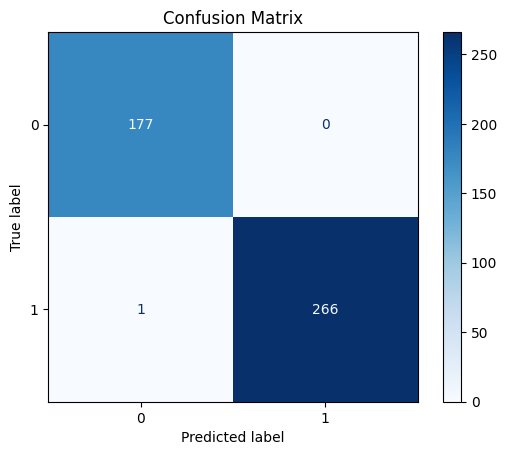

In [16]:
# polished code with the following improvements:
# - Feature Scaling, 
# - Add labels to confusion matrix for clarity, 
# - Set a random seed for reproducibility in train/test split
# - Use named columns instead of df.values for readability (optional but clearer):

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data/light_dark_font_training_set.csv")

X = df[['RED', 'GREEN', 'BLUE']]
Y = df['LIGHT_OR_DARK_FONT_IND']

# Split with fixed random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

# Predict on test set
prediction = model.predict(X_test)

# Confusion matrix
matrix = confusion_matrix(Y_test, prediction)
print("Confusion matrix:\n", matrix)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Even better performance:

|                         | **Orig Code** | **Updated Code (Scaling + other)** |
| ----------------------- | ------------- | -------------------------------- |
| **Accuracy**            | 97.88%        | **99.77%** ✅                     |
| **False Positives**     | 10            | **0** ✅                          |
| **False Negatives**     | 0             | 1                                |
| **Precision (class 1)** | \~96.3%       | **100%** ✅                       |
| **Recall (class 1)**    | 100%          | 99.6%                            |
| **F1 Score**            | \~98.1%       | **99.8%** ✅                      |


### 3. Pick a few different background colors (you can use an RGB tool like this one) and see if the logistic regression sensibly chooses a light (0) or dark (1) font for each one.

In [ ]:
# simple model with interactive shell for testing black (0,0,0) and white (255,255,255) 
# to see if dark and light fonts respectively are predicted correctly

import pandas as pd
from sklearn.linear_model import LogisticRegression 
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv("data/light_dark_font_training_set.csv", delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

# Test a prediction
while True:
    n = input("Input a color {red},{green},{blue}: ")
    if n is ('q' or 'Q'):
        break

    (r, g, b) = n.split(",")
    x = model.predict(np.array([[int(r), int(g), int(b)]]))
    if model.predict(np.array([[int(r), int(g), int(b)]]))[0] == 0.0:
        print(f"R: {r}, G:{g}, B:{b} - LIGHT")     
    else:
        print(f"R: {r}, G:{g}, B:{b} - DARK")

R: 0, G:0, B:0 - LIGHT
R: 1, G:2, B:3 - LIGHT
R: 12, G:5, B:22 - LIGHT
R: 234, G:222, B:243 DARK
R: 255, G:255, B:255 DARK


dark and light fonts are predicted correctly.

### 4. Based on the preceding exercises, do you think logistic regression is effective for predicting a light or dark font for a given background color?

Yes, the logistic regression is very effective at predicting light or dark fonts for a given background color. Not only is the accuracy extremely high, but the confusion matrix has high numbers in the top-right to bottom-left diagonal with lower numbers in the other cells.